In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

/home/gw/anaconda3/envs/studying/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_df = pd.read_csv('../input/spaceship-titanic/train.csv')
test_df = pd.read_csv('../input/spaceship-titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [45]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [16]:
train_df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [19]:
train_df['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [25]:
train_df[train_df['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [41]:
# def get_side(cabin):
#     print(cabin)
#     return cabin[:-1]

# train_df['Cabin'].apply(lambda x : get_side(x))
train_df['Cabin'].values.reshape(-1, 1).shape

(8693, 1)

In [9]:
def preprocess_features(input_df):
    df = input_df.copy()
    df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
    df.insert(0, 'UsedMoney', df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].values.sum(axis=1))
    df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

    return df

dropped_train_df = preprocess_features(train_df)
dropped_train_df.head()

,UsedMoney,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,736.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,10383.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False
3,5176.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,1091.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True


<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

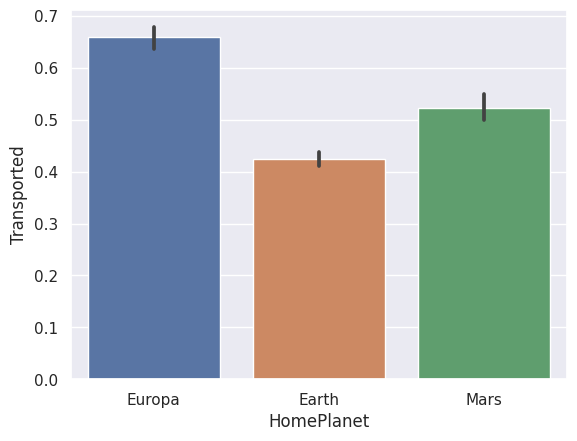

In [42]:
sns.barplot(x='HomePlanet', y='Transported', data=train_df)

<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

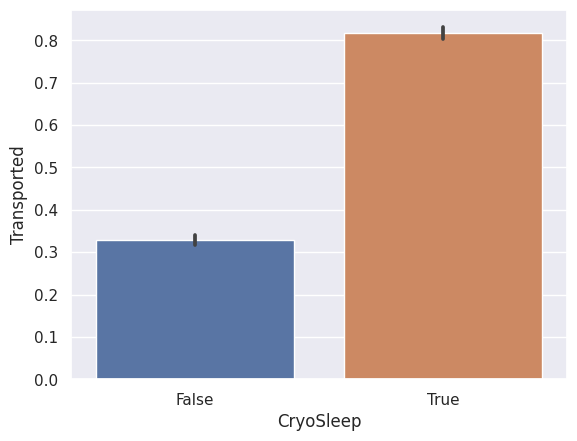

In [13]:
sns.barplot(x='CryoSleep', y='Transported', data=train_df)

<AxesSubplot:xlabel='VIP', ylabel='Transported'>

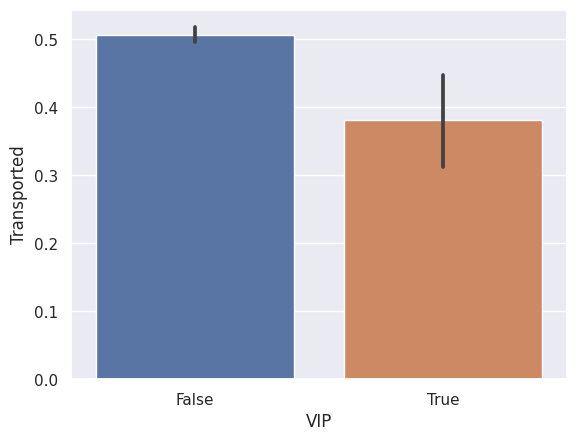

In [10]:
sns.barplot(x='VIP', y='Transported', data=train_df)

<AxesSubplot:xlabel='Destination', ylabel='Transported'>

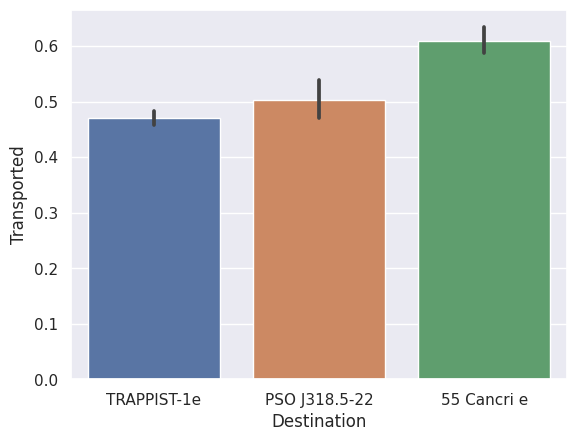

In [43]:
sns.barplot(x='Destination', y='Transported', data=train_df)

train.csv - 훈련 데이터로 사용되는 승객의 약 2/3(~8700)에 대한 개인 기록.
PassengerId- 각 승객에 대한 고유 ID입니다. 각 ID는 승객이 함께 여행하는 그룹 gggg_pp을 gggg나타내며 그룹 pp내 번호입니다. 그룹의 사람들은 종종 가족 구성원이지만 항상 그런 것은 아닙니다.
HomePlanet- 승객이 출발한 행성, 일반적으로 영구 거주 행성입니다.
CryoSleep- 승객이 항해 기간 동안 정지된 애니메이션에 들어가도록 선택했는지 여부를 나타냅니다. cryosleep의 승객은 객실에 국한됩니다.
Cabin- 승객이 머물고 있는 객실 번호. Port 또는 Starboard용일 수 있는 형식 deck/num/side을 취 합니다 .sidePS
Destination- 승객이 출발할 행성입니다.
Age- 승객의 나이.
VIP- 승객이 항해 중 특별 VIP 서비스를 지불했는지 여부.
RoomService, FoodCourt, ShoppingMall, - 승객이 우주선 타이타닉 의 다양한 고급 편의 시설 에 대해 청구 Spa한 VRDeck금액 입니다.
Name- 승객의 성과 이름.
Transported- 승객이 다른 차원으로 이송되었는지 여부. 이것은 예측하려는 대상인 열입니다.
test.csv - 테스트 데이터로 사용되는 나머지 승객의 1/3(~4300)에 대한 개인 기록. Transported당신의 임무는 이 세트에 있는 승객 의 가치를 예측하는 것 입니다.
sample_submission.csv - 올바른 형식의 제출 파일입니다.
PassengerId- 테스트 세트의 각 승객에 대한 ID입니다.
Transported- 목표. 각 승객에 대해 True또는 를 예측 False하십시오.